In [1]:
import pandas as pd
from collections import Counter
import numpy as np

In [2]:
def createMatriz(dataFrame):
    values = []
    for i in range(len(dataFrame)):
        values.append([
             dataFrame.loc[i]["N1"], 
             dataFrame.loc[i]["N2"], 
             dataFrame.loc[i]["N3"], 
             dataFrame.loc[i]["N4"], 
             dataFrame.loc[i]["N5"],
             dataFrame.loc[i]["N6"]])
        
    return values

def createDict(init:int, end:int):
    dictCopy = {}
    for i in range(init, end):
        dictCopy[i] = 0

    return dictCopy

### A função frequenceNumber(listNumber, nReference), faz uma varredura nas linhas da matriz [listNumber], em busca do valor de referência (nReference) e calcula a frequência dos valores mais associados (presentes nos jogos) ao número solicitado. Ao final temos um dicionário com: 

~~~python 
[{
  1: 29,
  2: 23,
  3: 28,
  4: 21,
  5: 0,
 ...
}, 1285].
~~~
##### Obs: O próprio número obtém frequência 0, porém, ao final é retornado a frequência total do valor: neste caso para o valor nReference = 5, temos: 1285.

In [3]:
#
def frequenceNumber(listNumber: [], nReference: int):
    copy = createDict(1, 61)
    count = 0

    for y in range(len(listNumber)):
        if( nReference in listNumber[y] ):
            for x in range(len(listNumber[0])):
                if( listNumber[y][x] != nReference ):
                    copy[listNumber[y][x]] += 1
                    count += 1

    return [copy, count]

### A função selectMaxNumbers(dictNumber, outSide) tem como objetivo, retornar uma quantidade especifica de valores (outSide) associados que se deseja estudar do dicionário (dictNumber). Por exemplo:

~~~python
{13: 28, 48: 28, 53: 28, 4: 26, 27: 26, 33: 26, 42: 26}
~~~
#### Para o valor (outSide = 7), ele retorna os 7 valores mais frequentes associados ao valor chave.

In [4]:
def selectMaxNumbers(dictNumber: {}, outSide: int):
    n = {}

    for aux in range(outSide):
        for count in range(1, 61):
            if( dictNumber[count] == max(dictNumber.values()) and max(dictNumber.values()) != 0 ):
                n[count] = dictNumber[count]
                dictNumber[count] = 0
                break

    return n

In [5]:
ms = pd.read_excel('MegaSena.xlsx')
ms.head()

,Concurso,Data,N1,N2,N3,N4,N5,N6,Ganhadores,Premio,HouveGanhador
0,2324,05/12/2020,2,16,19,31,43,60,0,NaN,0
1,2323,02/12/2020,20,27,35,39,50,59,0,NaN,0
2,2322,28/11/2020,2,5,10,29,34,41,0,NaN,0
3,2321,25/11/2020,14,25,28,41,43,46,1,3036906.71,1
4,2320,21/11/2020,6,30,35,39,42,48,1,76128023.58,1


#### Verificando o percentual de ganhadores

In [6]:
df_ganhadores = ms['Ganhadores']

In [7]:
wins = df_ganhadores[(df_ganhadores != 0)]; loss = df_ganhadores[(df_ganhadores == 0)]

In [8]:
wins_freq = (wins.count()/df_ganhadores.count())*100; 
print("No total, %.3f%% dos sorteios houve 1 ganhador ou mais." % wins_freq)
print("Resultando em um percentual de %.3f%% de sorteios sem vencedores." % (100-wins_freq))

No total, 22.892% dos sorteios houve 1 ganhador ou mais.
Resultando em um percentual de 77.108% de sorteios sem vencedores.


In [9]:
df_ganhadores.mean()

0.3489672977624785

## Unindo todos os valores jogados em uma única coluna

In [10]:
all_values = pd.concat([ms.N1, ms.N2, ms.N3, ms.N4, ms.N5, ms.N6])

## Agrupando os valores e verificando a frequência geral dos valores

In [11]:
all_values

0        2
1       20
2        2
3       14
4        6
        ..
2319    46
2320    59
2321    47
2322    49
2323    52
Length: 13944, dtype: int64

In [12]:
count = Counter(all_values.sort_values(ascending=True))

In [13]:
type(count)

collections.Counter

In [14]:
df = pd.DataFrame.from_dict(count, orient='index') #convertendo o objeto collections.Count em pd.DataFrame

In [15]:
df.head()

,0
1,231
2,238
3,212
4,251
5,257


In [16]:
df.columns = ['freq'] #renomeado a coluna da frequência

In [17]:
total = df['freq'].sum() #total de valores (daria no mesmo fazer (ms['Concurso'].count())/6 )
jogos = ms['Concurso'].count() #número total de jogos

In [18]:
total

13944

In [19]:
jogos

2324

#### Selecionando valores leatórios dentro dos 50 números mais sorteados

In [20]:
mydf = df.freq.sort_values(ascending=False).head(60).to_frame()
mydf.head()

,freq
10,265
53,264
5,257
33,255
23,254


In [21]:
#mydf.iloc[np.random.choice(np.arange(len(mydf)), 6, False)] #úmeros randomicos
mydf.loc[np.random.permutation(mydf.index)[:6]] #permutação

,freq
58,230
1,231
15,206
11,236
57,219
29,240


## Exibindo a frequência dos valores

In [22]:
import matplotlib.pyplot as plt

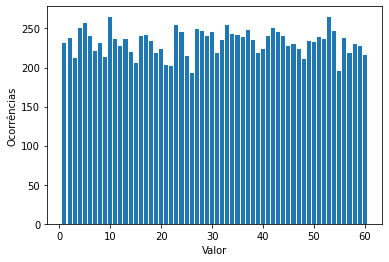

In [23]:
plt.bar(count.keys(), count.values())
plt.xlabel('Valor')
plt.ylabel('Ocorrências')
plt.show()

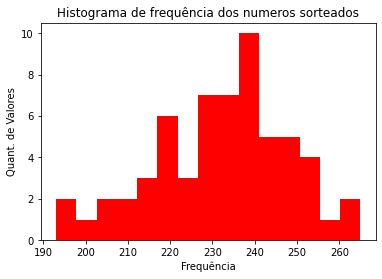

In [24]:
plt.hist(df["freq"], color='red', bins=15)
plt.title('Histograma de frequência dos numeros sorteados')
plt.xlabel('Frequência')
plt.ylabel('Quant. de Valores')

# Show graphic
plt.show()



In [25]:
df.describe()

,freq
count,60.000000
mean,232.400000
std,15.970524
min,193.000000
25%,220.750000
50%,235.000000
75%,242.250000
max,265.000000


<AxesSubplot:>

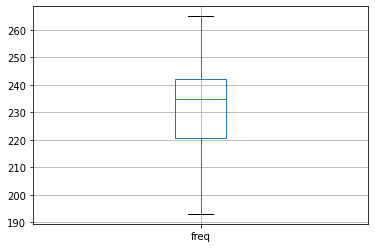

In [26]:
df.boxplot()

In [27]:
data = createMatriz(ms)
mostFrequenceValues = []
for i in range(16):
    value = frequenceNumber(data, mydf.index[i])
    final = selectMaxNumbers(value[0], 7)
    mostFrequenceValues.append({mydf.index[i]: final})
    print("%dº-" %(i+1),mydf.index[i], final)

1º- 10 {33: 33, 5: 30, 28: 30, 54: 29, 24: 28, 43: 28, 53: 28}
2º- 53 {38: 33, 23: 32, 36: 32, 8: 29, 41: 29, 6: 28, 10: 28}
3º- 5 {33: 34, 27: 33, 11: 32, 24: 31, 10: 30, 1: 29, 3: 28}
4º- 33 {5: 34, 10: 33, 24: 28, 42: 28, 6: 27, 11: 27, 31: 27}
5º- 23 {51: 32, 53: 32, 30: 31, 5: 28, 8: 27, 52: 27, 10: 26}
6º- 4 {52: 32, 38: 30, 27: 29, 44: 29, 29: 28, 30: 27, 54: 27}
7º- 42 {24: 30, 59: 30, 49: 29, 33: 28, 10: 27, 13: 27, 41: 27}
8º- 27 {5: 33, 40: 30, 4: 29, 46: 28, 52: 28, 11: 27, 41: 27}
9º- 37 {12: 31, 34: 29, 43: 28, 1: 27, 54: 27, 10: 26, 58: 26}
10º- 28 {6: 31, 10: 30, 32: 27, 43: 27, 51: 27, 45: 26, 53: 26}
11º- 54 {26: 30, 44: 30, 46: 30, 10: 29, 43: 29, 4: 27, 37: 27}
12º- 30 {23: 31, 11: 29, 18: 29, 35: 29, 4: 27, 47: 27, 52: 27}
13º- 43 {54: 29, 10: 28, 37: 28, 53: 28, 56: 28, 8: 27, 28: 27}
14º- 24 {5: 31, 42: 30, 10: 28, 33: 28, 6: 27, 13: 27, 38: 27}
15º- 34 {6: 32, 16: 29, 37: 29, 5: 27, 31: 27, 45: 26, 18: 25}
16º- 17 {13: 28, 48: 28, 53: 28, 4: 26, 27: 26, 33: 26, 

In [28]:
t = mostFrequenceValues[0].values()
a = list(t)
a = list(a[0].keys())
a.append(list(mostFrequenceValues[0].keys())[0])

for z in range(7):
    for i in range(2):
        print(list(mostFrequenceValues[z].keys())[0],"-", np.random.permutation(a)[:6])

10 - [43  5 10 54 24 33]
10 - [43  5 28 10 53 33]
53 - [24 10 28  5 54 43]
53 - [33  5 28 43 54 53]
5 - [10 53 24 54 28 43]
5 - [43 53 54  5 28 33]
33 - [53  5 10 54 24 43]
33 - [28 10  5 54 33 53]
23 - [24 33 53 54 28  5]
23 - [54 28 33 24 10  5]
4 - [24 28  5 54 10 43]
4 - [10 53 24 33  5 28]
42 - [28 10 53 24  5 54]
42 - [53 54 33 10 24 43]


## Rede Neural